In [95]:
%reload_ext autoreload
%autoreload 2
from timedomain import *

plt.style.use(astropy_mpl_style) 
warnings.filterwarnings("ignore", category=AstroMLDeprecationWarning)

In [96]:
data = pd.read_csv('data/processed/lcs.csv')

In [97]:
t = data.t.to_numpy()
y = data.main.to_numpy()
sigma = data.std_main.to_numpy()

dt = np.median(t[1:] - t[:-1])

gap = 150
l = t[np.concatenate([(t[1:] - t[0:-1]) > gap, [False]])]
r = t[np.concatenate([[False], (t[1:] - t[0:-1]) > gap])]
imp_n = ((r - l) / dt).astype(np.int32)
imp_dt = (r - l) / imp_n

imputed_ts = np.array([(np.arange(0, d*n, d) + b)[1:] for d, n, b in zip(imp_dt, imp_n, l)]).flatten()
imputed_df = pd.DataFrame(imputed_ts, columns=['t'])
imputed_data = data.join(imputed_df.set_index('t'), on='t', how='outer', sort=True)

mean_values=imputed_data.mean()
imputed_data = imputed_data.fillna(value=mean_values)

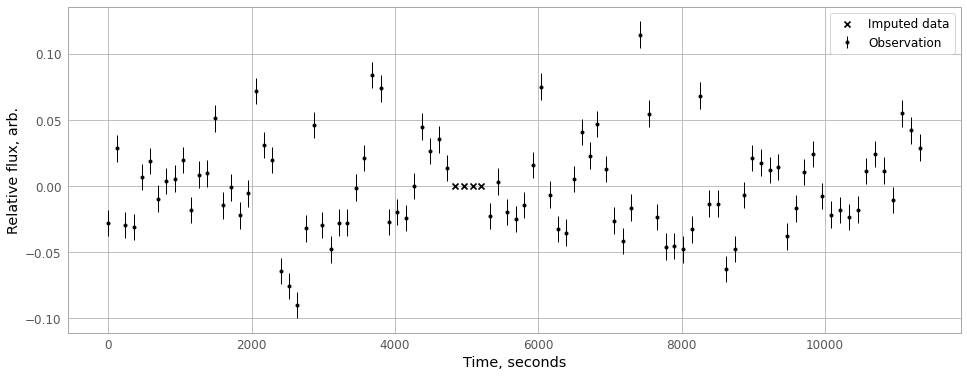

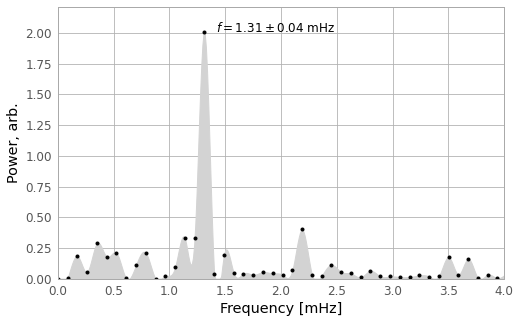

In [98]:
t_imp = imputed_data.t.to_numpy()
y_imp = imputed_data.main.to_numpy()
sigma_imp = imputed_data.main.to_numpy()

plot_ts(t, y, sigma, imputed_ts, [data.main.mean()] * len(imputed_ts), saveas='img/lightcurve.png')
plot_ps(t_imp, y_imp, saveas='img/power.png')

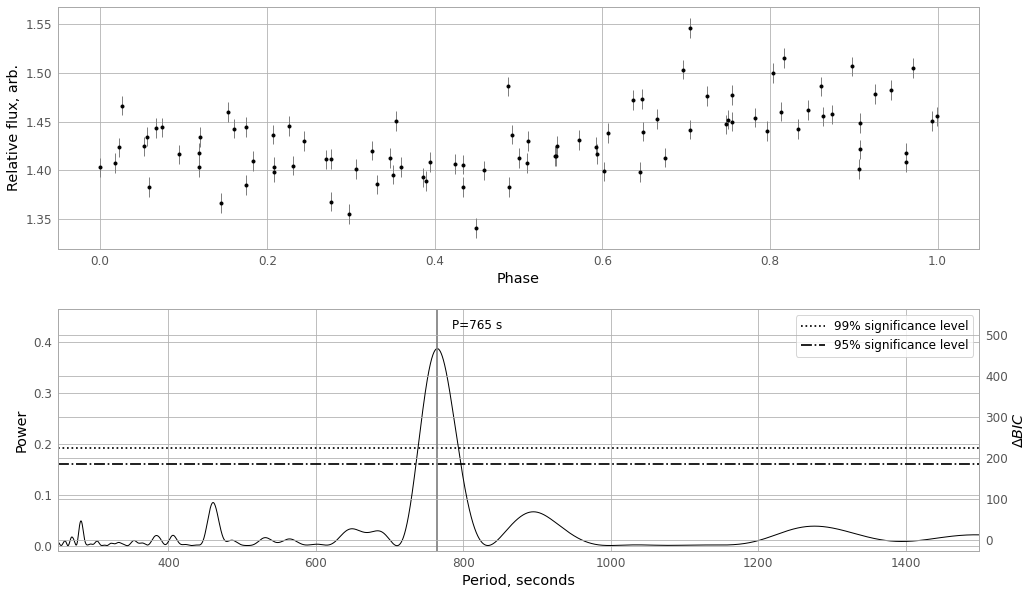

In [48]:
periodogram(t, y, sigma, saveas='img/ls_periodogram.png')

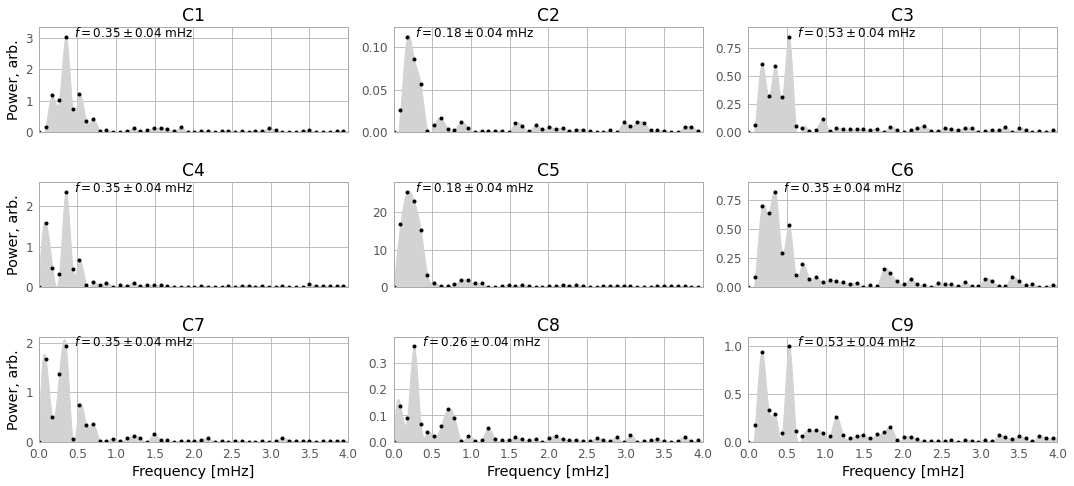

In [102]:
plt.figure(figsize=(15, 15))
for i in range(1,10):
    plt.subplot(730 + i)
    plt.title('C{}'.format(i))
    t_imp = imputed_data.t.to_numpy()
    y_imp = imputed_data['C_{}'.format(i)].to_numpy()
    sigma_imp = imputed_data['std_{}'.format(i)].to_numpy()

    #plot_ts(t, y, sigma, imputed_ts, [data.main.mean()] * len(imputed_ts))
    plot_ps(t_imp, y_imp, noshow=True, xlabel=(i>6), ylabel=(i%3==1))
    
plt.tight_layout()
plt.savefig('img/control.png', bbox_inches='tight', dpi=150)
plt.show()

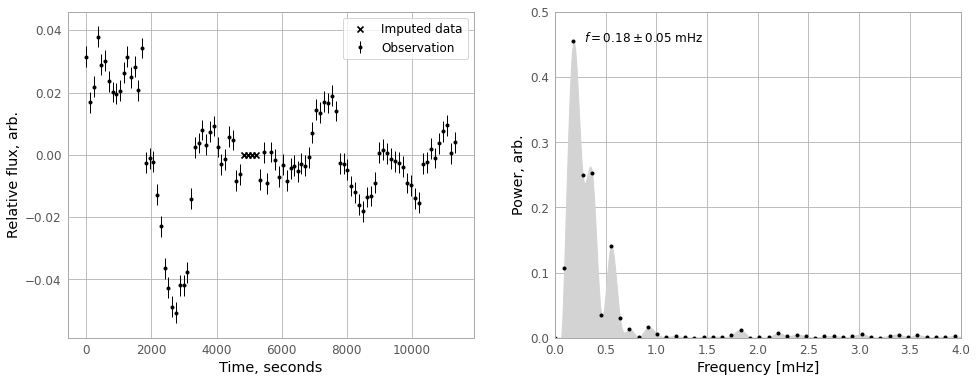

In [110]:
plt.figure(figsize=(16, 6))
comb = functools.reduce(operator.add, [data['C_{}'.format(i)]/np.mean(data['C_{}'.format(i)]) for i in range(1, 10)])/9
# subst = data.main/np.mean(data.main)  - comb
plt.subplot(121)
plot_ts(t, comb, sigma/3, imputed_ts, [0] * len(imputed_ts), noshow=True)
comb_imputed = functools.reduce(operator.add, [imputed_data['C_{}'.format(i)]/np.mean(imputed_data['C_{}'.format(i)]) for i in range(1, 10)])/9
plt.subplot(122)
plot_ps(t, comb.to_numpy(), noshow=True)

plt.savefig('img/average.png', bbox_inches='tight', dpi=150)
plt.show()

In [74]:
data

,t,main,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,...,std_main,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9
0,0.00,1.403263,3.524170,0.556149,1.689803,2.535386,0.801578,1.873426,1.738091,0.889236,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,116.92,1.459547,3.547460,0.530852,1.665559,2.546422,0.796190,1.868650,1.717197,0.892584,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,234.20,1.401738,3.568553,0.537589,1.672143,2.538689,0.794309,1.882476,1.736588,0.892597,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
3,350.56,1.400167,3.558209,0.551909,1.669177,2.552089,0.792019,1.882621,2.180878,0.890277,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,463.83,1.438074,3.513976,0.543034,1.631816,2.517793,0.816589,1.894808,2.117832,0.880966,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,10827.73,1.442733,3.514566,0.519321,1.643885,2.568393,0.882162,1.863573,1.687234,0.873363,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
89,10953.72,1.420361,3.560257,0.515630,1.639144,2.583564,0.895926,1.890120,1.705974,0.859059,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
90,11077.76,1.485944,3.551759,0.515673,1.631352,2.572642,0.895347,1.902375,1.698990,0.869177,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
91,11200.83,1.473119,3.519924,0.519819,1.612843,2.542145,0.899650,1.870517,1.678323,0.861360,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [75]:
data.C_9

0     1.074123
1     1.018127
2     1.026893
3     0.910280
4     0.905883
        ...   
88    0.886842
89    0.886172
90    0.900225
91    0.878437
92    0.881830
Name: C_9, Length: 93, dtype: float64